In [1]:
from torch.utils.data import Dataset, DataLoader, SequentialSampler
from HiSiNet.HiCDatasetClass import HiCDataset, SiameseHiCDataset
from HiSiNet.reference_dictionaries import reference_genomes
from HiSiNet import models
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import sys
 
import torch.nn.functional as F
def test_model(model, dataloader):
    distances = np.array([])
    labels = np.array([])
    for _, data in enumerate(dataloader):
        input1, input2, label = data
        label = label.type(torch.FloatTensor)#.to(cuda)
        output1, output2 = model(input1, input2)
        predicted = F.pairwise_distance(output1,output2)
        distances = np.concatenate((distances, predicted.cpu().detach().numpy()))
        label = label.type(torch.FloatTensor)
        labels  = np.concatenate((labels, label.cpu().detach().numpy()))
    return distances, labels

In [ ]:
p

In [36]:
triplet_loss_lenet="model_outputs/SLeNet_0.1_128_30004.ckpt"
good_le_net="model_outputs/SLeNet_0.1_17_30004.ckpt"
_224_lenet="model_outputs/SLeNet_0.1_128_30004.ckpt"
model = eval("models.SLeNet")(mask=True)
model.load_state_dict(torch.load(_224_lenet, map_location=torch.device('cpu')))
model.eval()
 
list_of_HiCDatasets =[HiCDataset.load(data_path) for data_path in ["/home/tt920/mnt/scratch/tt920/mlhic/test_CD69negDPWTR3_chr2.mlhic",
                                                        "/home/tt920/mnt/scratch/tt920/mlhic/test_CD69negDPWTR4_chr2.mlhic",
                                                       "/home/tt920/mnt/scratch/tt920/mlhic/test_CD69negDPPaxip1KOR1_chr2.mlhic", 
                                                       "/home/tt920/mnt/scratch/tt920/mlhic/test_CD69negDPPaxip1KOR2_chr2.mlhic"]]

Siamese =  SiameseHiCDataset(list_of_HiCDatasets,reference = reference_genomes["mm9"])
 
 
test_sampler_siam = SequentialSampler(Siamese)
dataloader_siam = DataLoader(Siamese, batch_size=100, sampler = test_sampler_siam)
distances, labels_siam = test_model(model, dataloader_siam)
pd_dict = Siamese.get_genomic_positions(append="chr")
pd_dict["distances"] = distances
df = pd.DataFrame(pd_dict)
df["labels"]=Siamese.labels
df["labels_siam"]=labels_siam

<Axes: xlabel='Start', ylabel='distances'>

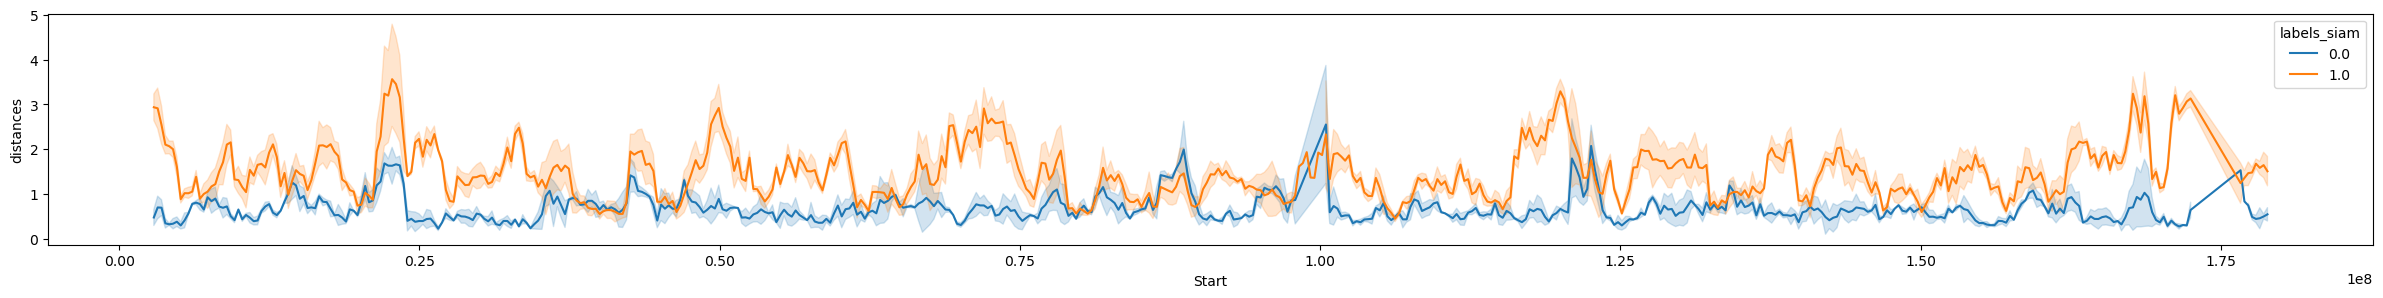

In [4]:
%config InlineBackend.figure_formats = ['png']

fig, (ax1) = plt.subplots(1,1, figsize=(30,3) )   
sns.lineplot(x=df.Start, y=df.distances, hue=df.labels_siam, ax=ax1)

<Axes: xlabel='Start', ylabel='distances'>

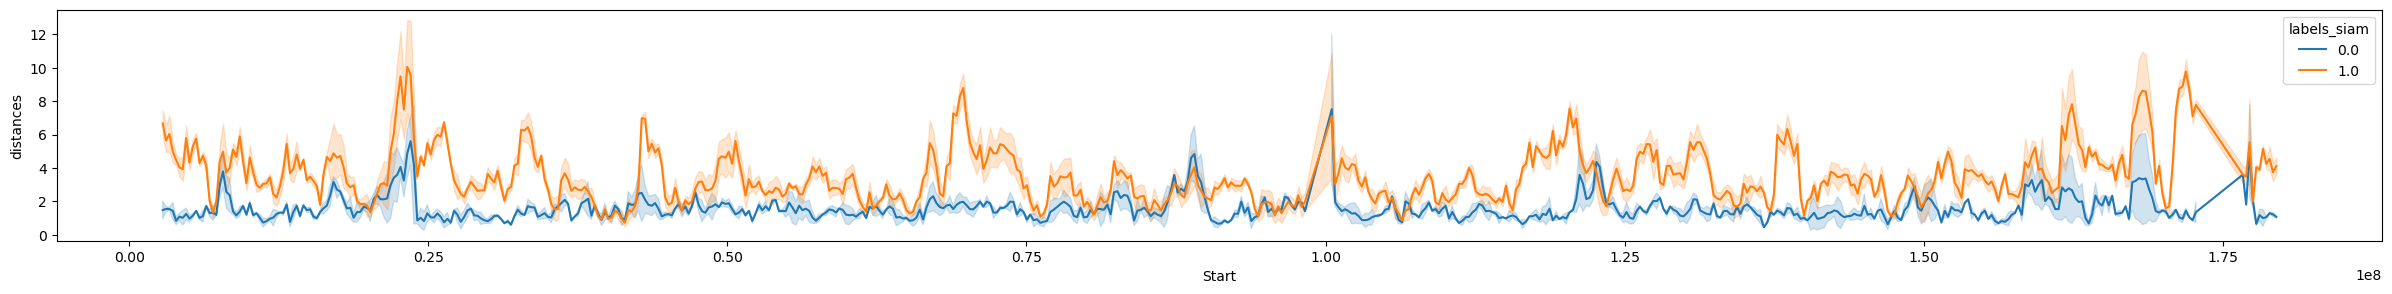

In [3]:
%config InlineBackend.figure_formats = ['png']

fig, (ax1) = plt.subplots(1,1, figsize=(30,3) )   
sns.lineplot(x=df.Start, y=df.distances, hue=df.labels_siam, ax=ax1)

<Axes: xlabel='Start', ylabel='distances'>

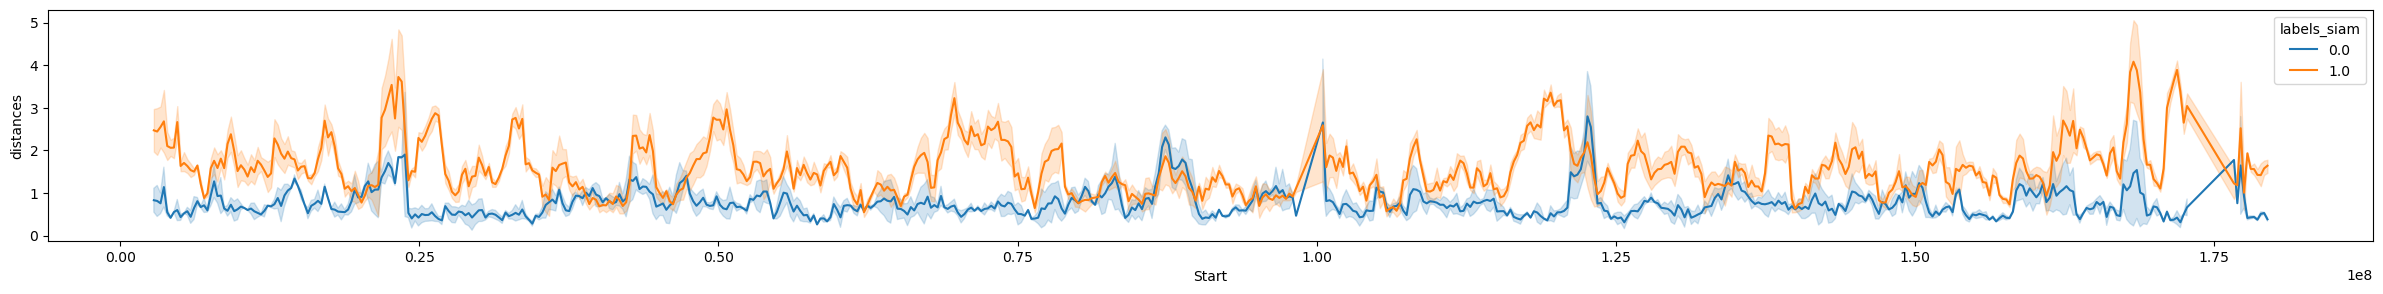

In [37]:
%config InlineBackend.figure_formats = ['png']

fig, (ax1) = plt.subplots(1,1, figsize=(30,3) )   
sns.lineplot(x=df.Start, y=df.distances, hue=df.labels_siam, ax=ax1)

[1.9628879]


Text(0.5, 0, 'euclidean distance of representation')

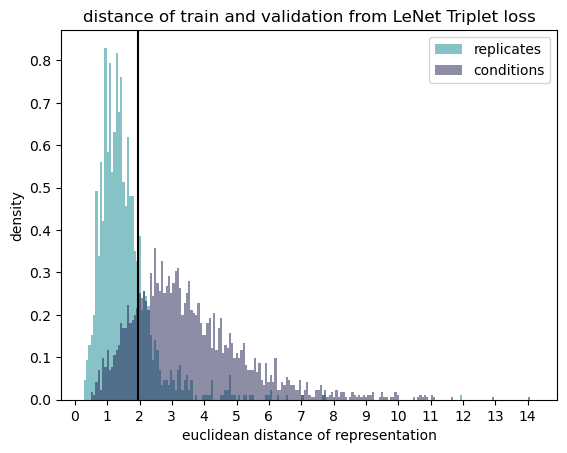

In [12]:
mx = max(distances)
mn = min(distances[distances>0])
rng = np.arange(mn, mx, (mx-mn)/200)

a = plt.hist(distances[(labels_siam==0)],bins=rng,  density=True, label='replicates', alpha=0.5, color='#108690')
b = plt.hist(distances[(labels_siam==1)],bins=rng, density=True, label='conditions', alpha=0.5, color='#1D1E4E')
intersect = a[1][np.argwhere(np.diff(np.sign(a[0]-b[0])))[0]]
print(intersect)
plt.axvline(intersect, color='k')
plt.xticks(np.arange(0,np.ceil(mx), 1))
plt.legend()
plt.title("distance of train and validation from LeNet Triplet loss")
plt.ylabel("density")
plt.xlabel("euclidean distance of representation")
#plt.savefig(args.model_infile.split(".ckpt")[0]+"_train_distribution.pdf")
#plt.close()

[0.94263272]


Text(0.5, 0, 'euclidean distance of representation')

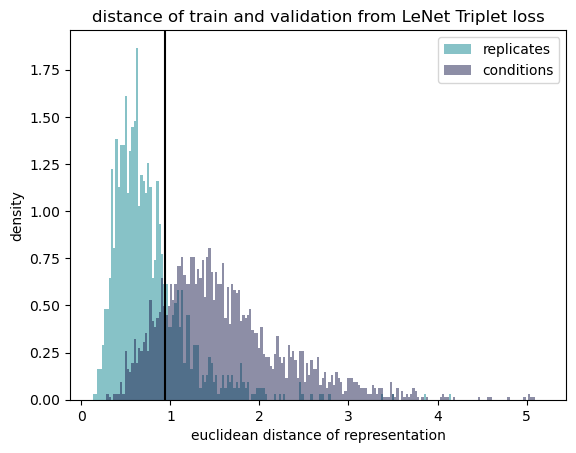

In [38]:
mx = max(distances)
mn = min(distances[distances>0])
rng = np.arange(mn, mx, (mx-mn)/200)

a = plt.hist(distances[(labels_siam==0)],bins=rng,  density=True, label='replicates', alpha=0.5, color='#108690')
b = plt.hist(distances[(labels_siam==1)],bins=rng, density=True, label='conditions', alpha=0.5, color='#1D1E4E')
intersect = a[1][np.argwhere(np.diff(np.sign(a[0]-b[0])))[0]]
print(intersect)
plt.axvline(intersect, color='k')
plt.xticks(np.arange(0,np.ceil(mx), 1))
plt.legend()
plt.title("distance of train and validation from LeNet Triplet loss")
plt.ylabel("density")
plt.xlabel("euclidean distance of representation")
#plt.savefig(args.model_infile.split(".ckpt")[0]+"_train_distribution.pdf")
#plt.close()